<a href="https://colab.research.google.com/github/rklepov/hse-cs-ml-2018-2019/blob/master/10-CV/01-intro/001-filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фильтрация изображений

## Загружаем и выводим тестовое изображение

In [0]:
import cv2
import numpy as np

In [0]:
img = cv2.imread('./lena.png')

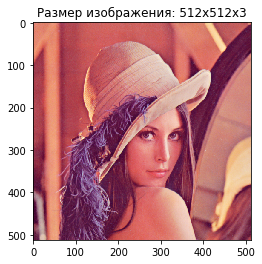

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])
plt.title('Размер изображения: %dx%dx%d' % img.shape)
plt.show()

## Функции создания ядер

In [0]:
ksize = 5
ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
xx, yy = np.meshgrid(ax, ax)

In [0]:
xx

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

In [0]:
def gauss_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает гауссовское ядро размера ksize и дисперсией sigma """
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (sigma * np.sqrt(2. * np.pi)) * np.exp(-e)
    return kernel / np.sum(kernel)

def laplace_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает ядро Лапласа размера ksize и дисперсией sigma """
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (np.pi * sigma**4) * (1. - e) * np.exp(-e)
    return kernel / np.sum(kernel)

kernels = {'gauss': gauss_kernel, 
           'laplace': laplace_kernel}

## Визуализация ядер

\# pip install ipywidgets<br/>
\# jupyter nbextension enable --py widgetsnbextension

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_kernel(kernel_type, ksize, sigma):
    kernel = kernels[kernel_type](ksize, sigma)
    r = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(r, r)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, kernel, 
                    cmap=plt.cm.coolwarm,
                    linewidth=0, antialiased=True)
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [0]:
from ipywidgets import interact

interact(show_kernel, 
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1));

interactive(children=(Dropdown(description='kernel_type', options=('gauss', 'laplace'), value='gauss'), IntSli…

## Фильтрация изображения

In [0]:
def filter_img(kernel_type, ksize = 5, sigma = 2.5):
    kernel = kernels[kernel_type](ksize, sigma)
    result = cv2.filter2D(img, cv2.CV_32F, kernel)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    img_abs = np.abs(result)
    img_norm = img_abs / np.max(img_abs, axis=(0, 1))
    ax.imshow(img_norm[...,::-1])
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [0]:
kernel = kernels['gauss'](5, 2.5)
img_filtered = cv2.filter2D(img, cv2.CV_32F, kernel)

In [0]:
abs_img_filtered = np.abs(img_filtered)

In [0]:
# нормировка
channel_max = abs_img_filtered.max(axis=(0, 1))
norm_img_filtered = abs_img_filtered / channel_max

In [0]:
interact(filter_img, 
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1));

interactive(children=(Dropdown(description='kernel_type', options=('gauss', 'laplace'), value='gauss'), IntSli…